In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Stats
from scipy.stats import boxcox
from scipy import stats
from scipy.stats import norm, skew
from statistics import mode
from scipy.special import boxcox1p,inv_boxcox1p
from scipy.special import inv_boxcox
from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("./Data/usedCleaned2021.csv")
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

In [112]:
print("{0} skew : ".format('Cena'), skew(df['Cena']))

Cena skew :  1.6271466019020944


Lambda value used for Transformation: -0.20593117239342126


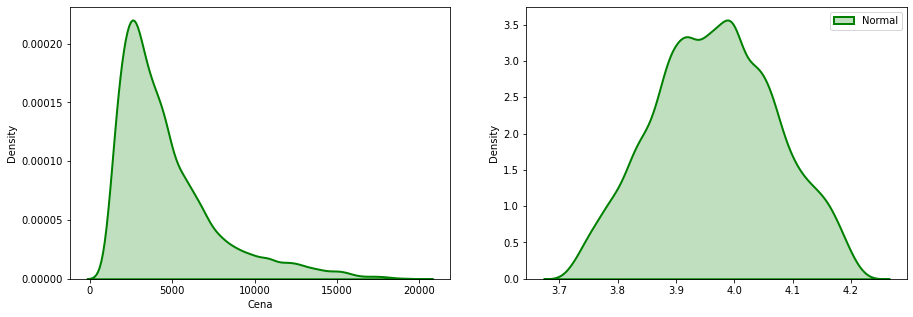

In [101]:
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(df['Cena'])
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(df['Cena'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(15)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

mu = 4690.5029181048 and sigma = 3017.9884808448737


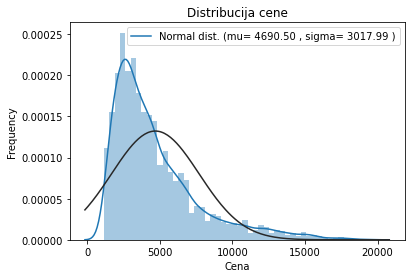

In [113]:
(mu, sigma) = norm.fit(df['Cena'])

# 1. Plot Price
sns.distplot(df['Cena'], fit=norm);
plt.ylabel('Frequency')
plt.title('Distribucija cene')
plt.legend(['Normal dist. (mu= {:.2f} , sigma= {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( 'mu = {} and sigma = {}'.format(mu, sigma))

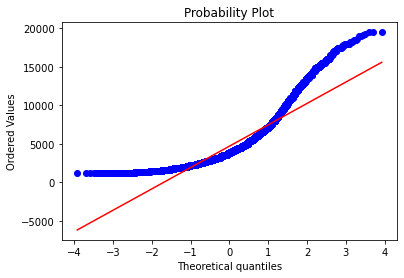

In [114]:
# Before transfortmation
fig = plt.figure()
res = stats.probplot(df['Cena'], plot=plt)
plt.show()

In [115]:
#applying box-cox transformation to remove skewness and converting it to normal distribution
price_box,lam_price= boxcox(df['Cena'])
df['Cena'] = price_box

mu_boxcox = 4.01 and sigma_boxcox = 0.11


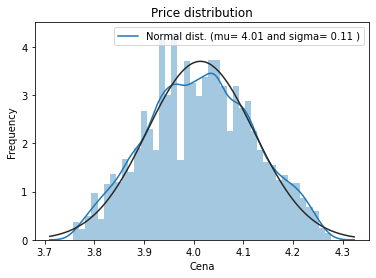

In [116]:
(mu, sigma) = norm.fit(df['Cena'])

# 1. Plot Price
sns.distplot(df['Cena'], fit=norm);
plt.ylabel('Frequency')
plt.title('Price distribution')
plt.legend(['Normal dist. (mu= {:.2f} and sigma= {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( 'mu_boxcox = {:.2f} and sigma_boxcox = {:.2f}'.format(mu, sigma))

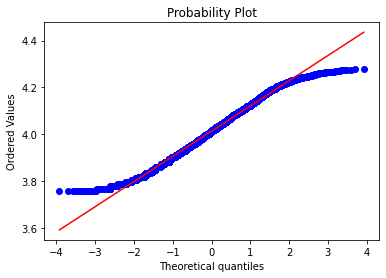

In [117]:
# After the transformation
fig = plt.figure()
res = stats.probplot(df['Cena'], plot=plt)
plt.show()

In [107]:
print("{0} skew : ".format('Cena'), skew(df['Cena']))

Cena skew :  0.023361253155069334


In [108]:
df

,Marka,Model,Godiste,Kilometraza,Karoserija,Gorivo,Kubikaza,Snaga motora,Cena,EKM,Pogon,Menjac,Klima,Boja,Materijal enterijera,prosek_god_km,Starost,sin_odo,sin_age
0,BMW,116,2015,194000,Hecbek,Dizel,1.5,115,4.140102,Euro 6,Zadnji,Manuelni 6 brzina,Manuelna klima,Plava,Stof,32333.333333,6,0.362040,-0.279415
1,BMW,116,2015,176000,Hecbek,Dizel,1.5,115,4.141313,Euro 6,Zadnji,Manuelni 6 brzina,Manuelna klima,Crna,Stof,29333.333333,6,0.992127,-0.279415
2,BMW,116,2016,185000,Hecbek,Dizel,1.5,115,4.174049,Euro 6,Zadnji,Automatski / poluautomatski,Automatska klima,Bela,Stof,37000.000000,5,-0.859049,-0.958924
3,BMW,116,2015,197000,Hecbek,Dizel,1.5,115,4.131561,Euro 6,Zadnji,Manuelni 6 brzina,Automatska klima,Plava,Stof,32833.333333,6,-0.148915,-0.279415
4,BMW,116,2016,141000,Hecbek,Dizel,1.5,115,4.164512,Euro 6,Zadnji,Manuelni 6 brzina,Automatska klima,Crna,Stof,28200.000000,5,-0.820039,-0.958924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15834,Opel,Zafira,2003,225000,MiniVan,Dizel,2.0,100,3.806382,Euro 3,Prednji,Manuelni 5 brzina,Manuelna klima,Druga,Stof,12500.000000,18,-0.761646,-0.750987
15835,Opel,Zafira,2003,315234,MiniVan,Dizel,2.0,100,3.799909,Euro 3,Prednji,Manuelni 5 brzina,Manuelna klima,Siva,Stof,17513.000000,18,0.305014,-0.750987
15836,Opel,Zafira,2004,225000,MiniVan,Dizel,2.0,100,3.840824,Euro 3,Prednji,Manuelni 5 brzina,Automatska klima,Plava,Stof,13235.294118,17,-0.761646,-0.961397
15837,Opel,Zafira,2002,220000,MiniVan,Dizel,2.0,100,3.806382,Euro 3,Prednji,Manuelni 5 brzina,Manuelna klima,Druga,Stof,11578.947368,19,0.522393,0.149877


In [118]:
df.drop(columns = ['sin_odo', 'sin_age', 'Starost'], inplace=True)

In [119]:
df.to_csv('./Data/usedCleaned2021.csv', index=False)

In [95]:
# New Variable prosek kilometraze po godini

In [96]:
df['prosek_god_km']=df['Kilometraza']/(2021 - df['Godiste'])
df['Starost'] = 2021-df['Godiste']

mu = 16339.551629863872 and sigma = 5377.897257351836


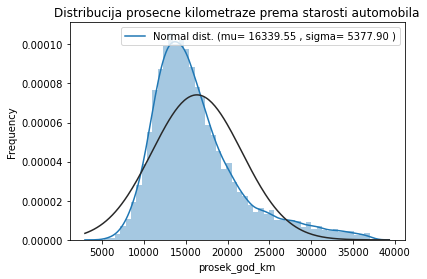

In [97]:
(mu, sigma) = norm.fit(df['prosek_god_km'])

# 1. Plot Price
sns.distplot(df['prosek_god_km'], fit=norm);
plt.ylabel('Frequency')
plt.title('Distribucija prosecne kilometraze prema starosti automobila')
plt.legend(['Normal dist. (mu= {:.2f} , sigma= {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( 'mu = {} and sigma = {}'.format(mu, sigma))

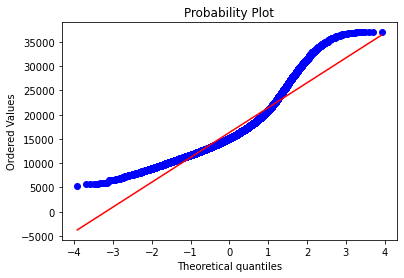

In [70]:
# Before transfortmation
fig = plt.figure()
res = stats.probplot(df['prosek_god_km'], plot=plt)
plt.show()

In [71]:
#applying box-cox transformation to remove skewness and converting it to normal distribution
prosek_box,lam_avg_km= boxcox(df['prosek_god_km'])
df['prosek_god_km'] = prosek_box

mu_boxcox = 2.46 and sigma_boxcox = 0.01


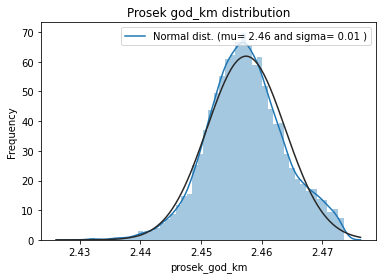

In [72]:
(mu, sigma) = norm.fit(df['prosek_god_km'])

# 1. Plot Price
sns.distplot(df['prosek_god_km'], fit=norm);
plt.ylabel('Frequency')
plt.title('Prosek god_km distribution')
plt.legend(['Normal dist. (mu= {:.2f} and sigma= {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( 'mu_boxcox = {:.2f} and sigma_boxcox = {:.2f}'.format(mu, sigma))

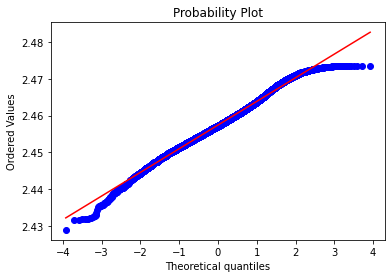

In [73]:
# After transfortmation
fig = plt.figure()
res = stats.probplot(df['prosek_god_km'], plot=plt)
plt.show()

In [110]:
df

,Marka,Model,Godiste,Kilometraza,Karoserija,Gorivo,Kubikaza,Snaga motora,Cena,EKM,Pogon,Menjac,Klima,Boja,Materijal enterijera,prosek_god_km
0,BMW,116,2015,194000,Hecbek,Dizel,1.5,115,4.140102,Euro 6,Zadnji,Manuelni 6 brzina,Manuelna klima,Plava,Stof,32333.333333
1,BMW,116,2015,176000,Hecbek,Dizel,1.5,115,4.141313,Euro 6,Zadnji,Manuelni 6 brzina,Manuelna klima,Crna,Stof,29333.333333
2,BMW,116,2016,185000,Hecbek,Dizel,1.5,115,4.174049,Euro 6,Zadnji,Automatski / poluautomatski,Automatska klima,Bela,Stof,37000.000000
3,BMW,116,2015,197000,Hecbek,Dizel,1.5,115,4.131561,Euro 6,Zadnji,Manuelni 6 brzina,Automatska klima,Plava,Stof,32833.333333
4,BMW,116,2016,141000,Hecbek,Dizel,1.5,115,4.164512,Euro 6,Zadnji,Manuelni 6 brzina,Automatska klima,Crna,Stof,28200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15834,Opel,Zafira,2003,225000,MiniVan,Dizel,2.0,100,3.806382,Euro 3,Prednji,Manuelni 5 brzina,Manuelna klima,Druga,Stof,12500.000000
15835,Opel,Zafira,2003,315234,MiniVan,Dizel,2.0,100,3.799909,Euro 3,Prednji,Manuelni 5 brzina,Manuelna klima,Siva,Stof,17513.000000
15836,Opel,Zafira,2004,225000,MiniVan,Dizel,2.0,100,3.840824,Euro 3,Prednji,Manuelni 5 brzina,Automatska klima,Plava,Stof,13235.294118
15837,Opel,Zafira,2002,220000,MiniVan,Dizel,2.0,100,3.806382,Euro 3,Prednji,Manuelni 5 brzina,Manuelna klima,Druga,Stof,11578.947368


In [120]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#df_enc = pd.read_csv("./Data/usedCleaned2021.csv")
df_enc = df
X_t =  df_enc.drop(columns=['Cena'])
Y_t = df_enc['Cena']

df_enc = pd.get_dummies(df_enc)
X =  df_enc.drop(columns=['Cena'])
Y = df_enc['Cena']


X_train, X_test, y_train, y_test =train_test_split(X,Y,
                                                   test_size=0.3,
                                                   random_state=0)
X_train_t, X_test_t, y_train_t, y_test_t =train_test_split(X_t,Y_t,
                                                   test_size=0.3,
                                                   random_state=0)

In [121]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import catboost as cb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)


In [77]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

In [122]:
model = cb.CatBoostRegressor(loss_function='MAE')

In [123]:
hyperparameters = {'iterations': [1000, 1200],
        'learning_rate': [0.1, 0.01, 0.2],
        'depth': [6, 8, 10],
        'l2_leaf_reg': [1, 3, 5]}
#model.grid_search(hyperparameters, train_dataset)

In [124]:
hyperparameters = {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 1000, 'depth': 8}
model = cb.CatBoostRegressor(**hyperparameters)

In [125]:
model.fit(train_dataset)

0:	learn: 0.0996141	total: 19.8ms	remaining: 19.8s
1:	learn: 0.0921224	total: 24.6ms	remaining: 12.3s
2:	learn: 0.0847640	total: 29.2ms	remaining: 9.71s
3:	learn: 0.0783050	total: 34.1ms	remaining: 8.48s
4:	learn: 0.0729682	total: 38.6ms	remaining: 7.68s
5:	learn: 0.0682435	total: 43.1ms	remaining: 7.14s
6:	learn: 0.0636488	total: 47.8ms	remaining: 6.78s
7:	learn: 0.0597567	total: 52.3ms	remaining: 6.48s
8:	learn: 0.0564745	total: 56.8ms	remaining: 6.26s
9:	learn: 0.0535060	total: 61.3ms	remaining: 6.07s
10:	learn: 0.0505226	total: 66.1ms	remaining: 5.94s
11:	learn: 0.0478460	total: 70.5ms	remaining: 5.8s
12:	learn: 0.0456882	total: 75.2ms	remaining: 5.71s
13:	learn: 0.0434676	total: 79.8ms	remaining: 5.62s
14:	learn: 0.0417026	total: 84.4ms	remaining: 5.54s
15:	learn: 0.0399745	total: 89ms	remaining: 5.47s
16:	learn: 0.0386221	total: 93.6ms	remaining: 5.41s
17:	learn: 0.0375412	total: 98.3ms	remaining: 5.36s
18:	learn: 0.0363972	total: 103ms	remaining: 5.3s
19:	learn: 0.0354972	total:

174:	learn: 0.0210240	total: 740ms	remaining: 3.49s
175:	learn: 0.0209895	total: 744ms	remaining: 3.48s
176:	learn: 0.0209604	total: 749ms	remaining: 3.48s
177:	learn: 0.0209267	total: 753ms	remaining: 3.48s
178:	learn: 0.0209030	total: 757ms	remaining: 3.47s
179:	learn: 0.0208823	total: 762ms	remaining: 3.47s
180:	learn: 0.0208520	total: 767ms	remaining: 3.47s
181:	learn: 0.0208247	total: 771ms	remaining: 3.46s
182:	learn: 0.0208072	total: 775ms	remaining: 3.46s
183:	learn: 0.0207789	total: 780ms	remaining: 3.46s
184:	learn: 0.0207504	total: 784ms	remaining: 3.45s
185:	learn: 0.0207222	total: 788ms	remaining: 3.45s
186:	learn: 0.0206991	total: 792ms	remaining: 3.44s
187:	learn: 0.0206715	total: 797ms	remaining: 3.44s
188:	learn: 0.0206414	total: 801ms	remaining: 3.44s
189:	learn: 0.0206153	total: 805ms	remaining: 3.43s
190:	learn: 0.0205935	total: 809ms	remaining: 3.43s
191:	learn: 0.0205702	total: 813ms	remaining: 3.42s
192:	learn: 0.0205481	total: 817ms	remaining: 3.42s
193:	learn: 

344:	learn: 0.0175748	total: 1.46s	remaining: 2.77s
345:	learn: 0.0175563	total: 1.47s	remaining: 2.77s
346:	learn: 0.0175439	total: 1.47s	remaining: 2.77s
347:	learn: 0.0175280	total: 1.47s	remaining: 2.76s
348:	learn: 0.0175076	total: 1.48s	remaining: 2.76s
349:	learn: 0.0174867	total: 1.48s	remaining: 2.75s
350:	learn: 0.0174761	total: 1.49s	remaining: 2.75s
351:	learn: 0.0174647	total: 1.49s	remaining: 2.74s
352:	learn: 0.0174530	total: 1.5s	remaining: 2.74s
353:	learn: 0.0174380	total: 1.5s	remaining: 2.74s
354:	learn: 0.0174222	total: 1.5s	remaining: 2.73s
355:	learn: 0.0174015	total: 1.51s	remaining: 2.73s
356:	learn: 0.0173843	total: 1.51s	remaining: 2.72s
357:	learn: 0.0173723	total: 1.52s	remaining: 2.72s
358:	learn: 0.0173543	total: 1.52s	remaining: 2.71s
359:	learn: 0.0173398	total: 1.52s	remaining: 2.71s
360:	learn: 0.0173264	total: 1.53s	remaining: 2.71s
361:	learn: 0.0173111	total: 1.53s	remaining: 2.7s
362:	learn: 0.0172960	total: 1.54s	remaining: 2.7s
363:	learn: 0.017

513:	learn: 0.0154422	total: 2.18s	remaining: 2.06s
514:	learn: 0.0154304	total: 2.18s	remaining: 2.06s
515:	learn: 0.0154202	total: 2.19s	remaining: 2.05s
516:	learn: 0.0154064	total: 2.19s	remaining: 2.05s
517:	learn: 0.0153951	total: 2.19s	remaining: 2.04s
518:	learn: 0.0153803	total: 2.2s	remaining: 2.04s
519:	learn: 0.0153730	total: 2.2s	remaining: 2.03s
520:	learn: 0.0153643	total: 2.21s	remaining: 2.03s
521:	learn: 0.0153557	total: 2.21s	remaining: 2.02s
522:	learn: 0.0153405	total: 2.22s	remaining: 2.02s
523:	learn: 0.0153312	total: 2.22s	remaining: 2.02s
524:	learn: 0.0153232	total: 2.22s	remaining: 2.01s
525:	learn: 0.0153151	total: 2.23s	remaining: 2.01s
526:	learn: 0.0153068	total: 2.23s	remaining: 2s
527:	learn: 0.0152980	total: 2.24s	remaining: 2s
528:	learn: 0.0152878	total: 2.24s	remaining: 2s
529:	learn: 0.0152764	total: 2.25s	remaining: 1.99s
530:	learn: 0.0152695	total: 2.25s	remaining: 1.99s
531:	learn: 0.0152616	total: 2.25s	remaining: 1.98s
532:	learn: 0.0152551	t

680:	learn: 0.0138872	total: 2.9s	remaining: 1.36s
681:	learn: 0.0138795	total: 2.9s	remaining: 1.35s
682:	learn: 0.0138722	total: 2.91s	remaining: 1.35s
683:	learn: 0.0138643	total: 2.91s	remaining: 1.34s
684:	learn: 0.0138480	total: 2.92s	remaining: 1.34s
685:	learn: 0.0138388	total: 2.92s	remaining: 1.34s
686:	learn: 0.0138292	total: 2.92s	remaining: 1.33s
687:	learn: 0.0138248	total: 2.93s	remaining: 1.33s
688:	learn: 0.0138129	total: 2.94s	remaining: 1.32s
689:	learn: 0.0138060	total: 2.94s	remaining: 1.32s
690:	learn: 0.0137965	total: 2.94s	remaining: 1.32s
691:	learn: 0.0137874	total: 2.95s	remaining: 1.31s
692:	learn: 0.0137805	total: 2.95s	remaining: 1.31s
693:	learn: 0.0137730	total: 2.96s	remaining: 1.3s
694:	learn: 0.0137643	total: 2.96s	remaining: 1.3s
695:	learn: 0.0137552	total: 2.97s	remaining: 1.3s
696:	learn: 0.0137497	total: 2.97s	remaining: 1.29s
697:	learn: 0.0137428	total: 2.98s	remaining: 1.29s
698:	learn: 0.0137325	total: 2.98s	remaining: 1.28s
699:	learn: 0.013

851:	learn: 0.0126019	total: 3.62s	remaining: 629ms
852:	learn: 0.0125940	total: 3.62s	remaining: 624ms
853:	learn: 0.0125836	total: 3.63s	remaining: 620ms
854:	learn: 0.0125765	total: 3.63s	remaining: 616ms
855:	learn: 0.0125698	total: 3.63s	remaining: 612ms
856:	learn: 0.0125640	total: 3.64s	remaining: 607ms
857:	learn: 0.0125579	total: 3.64s	remaining: 603ms
858:	learn: 0.0125531	total: 3.65s	remaining: 599ms
859:	learn: 0.0125495	total: 3.65s	remaining: 595ms
860:	learn: 0.0125431	total: 3.66s	remaining: 590ms
861:	learn: 0.0125397	total: 3.66s	remaining: 586ms
862:	learn: 0.0125345	total: 3.67s	remaining: 582ms
863:	learn: 0.0125309	total: 3.67s	remaining: 578ms
864:	learn: 0.0125273	total: 3.67s	remaining: 573ms
865:	learn: 0.0125209	total: 3.68s	remaining: 569ms
866:	learn: 0.0125155	total: 3.68s	remaining: 565ms
867:	learn: 0.0125087	total: 3.69s	remaining: 561ms
868:	learn: 0.0125055	total: 3.69s	remaining: 556ms
869:	learn: 0.0125006	total: 3.69s	remaining: 552ms
870:	learn: 

In [126]:
predictions = model.predict(test_dataset)
y_test= inv_boxcox(y_test,lam_price)
predictions = inv_boxcox(predictions,lam_price)

MAE = (mean_absolute_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print('MAE: {:.2f}'.format(MAE))
print('R2: {:.2f}'.format(r2))

MAE: 352.59
R2: 0.97


In [127]:
lam_price

-0.20206420217754742

In [128]:
import pickle
with open('./models/cb_model.pkl', 'wb') as files:
    pickle.dump(model, files)

In [130]:
pd.DataFrame({'feature_importance': model.get_feature_importance(train_dataset), 
              'feature_names': X_train.columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False)

,feature_importance,feature_names
0,48.028078,Godiste
6,6.397039,Marka_Audi
3,5.546359,Snaga motora
23,5.086575,Marka_Volkswagen
123,4.840646,EKM_Euro 4
...,...,...
61,0.004640,Model_C4 Grand Picasso
83,0.003688,Model_Kuga
98,0.003624,Model_Q5
16,0.003227,Marka_Nissan


In [56]:
X_train

,Godiste,Kilometraza,Kubikaza,Snaga motora,Marka_Alfa Romeo,Marka_Audi,Marka_BMW,Marka_Citroen,Marka_Fiat,Marka_Ford,...,Boja_Bela,Boja_Crna,Boja_Crvena,Boja_Druga,Boja_Plava,Boja_Siva,Materijal enterijera_Drugi,Materijal enterijera_Kombinovana koza,Materijal enterijera_Prirodna koza,Materijal enterijera_Stof
15780,2003,199000,2.0,115,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
14819,2016,198000,2.0,190,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
16755,2017,199999,2.0,150,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
14048,2002,240000,1.9,130,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
13585,2009,178307,1.8,160,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,2007,167800,1.2,75,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
13123,2007,198508,1.7,125,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
9845,2011,224000,2.0,140,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
10799,2011,128000,1.4,160,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [28]:
df_out = X_test_t
df_out['Cena_actual'] = y_test
df_out['Cena_predicted'] = predictions

In [29]:
df_out['MAE'] = abs(df_out['Cena_actual']-df_out['Cena_predicted'])

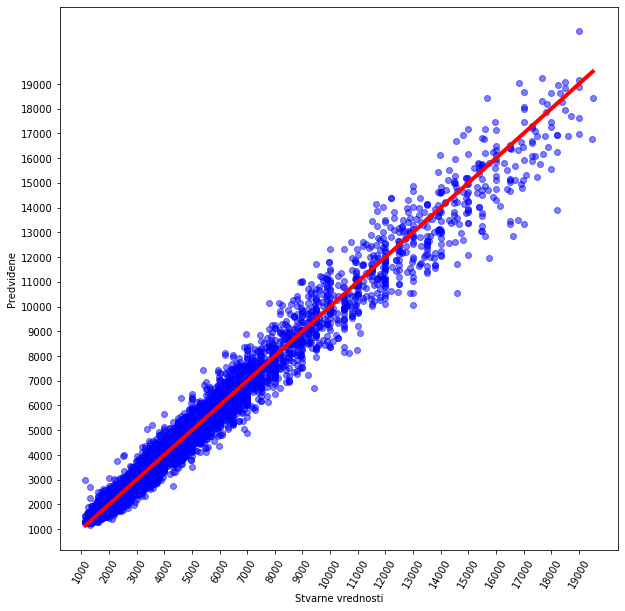

In [31]:
#Plot Real vs Predict

plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, color='blue', edgecolors=(0, 0, 1),alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=4,color='Red')
plt.xlabel('Stvarne vrednosti')
plt.xticks(np.arange(1000, 20000, 1000), rotation=60)
plt.yticks(np.arange(1000, 20000, 1000))
plt.ylabel('Predviđene')
plt.show()

In [49]:
df_enc

,Godiste,Kilometraza,Kubikaza,Snaga motora,Cena,prosek_god_km,Starost,Marka_Alfa Romeo,Marka_Audi,Marka_BMW,...,Boja_Bela,Boja_Crna,Boja_Crvena,Boja_Druga,Boja_Plava,Boja_Siva,Materijal enterijera_Drugi,Materijal enterijera_Kombinovana koza,Materijal enterijera_Prirodna koza,Materijal enterijera_Stof
0,2008,150000,1.0,70,3.865447,1.794327,13,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2008,152210,1.0,70,3.869936,1.794409,13,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2008,130000,1.0,70,3.872754,1.793492,13,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2007,161653,1.0,70,3.830618,1.794331,14,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,2007,141390,1.0,70,3.856749,1.793552,14,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17484,2003,225000,2.0,100,3.760978,1.794766,18,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17485,2003,315234,2.0,100,3.754709,1.796416,18,0,0,0,...,0,0,0,0,0,1,0,0,0,1
17486,2004,225000,2.0,100,3.794327,1.795068,17,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17487,2002,220000,2.0,100,3.760978,1.794347,19,0,0,0,...,0,0,0,1,0,0,0,0,0,1
